In [1]:
# handling outliers and the skewness
# newspaper is right skewed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df=pd.read_csv("advertising.csv")

''' 
the newspaper is right skewed and there are some outliers in them so to fix that we use logarithmic
np.log1p applies log(1+x) to each data so as to maintain the same range.
'''
df['Newspaper']=np.log1p(df["Newspaper"])
df['Newspaper'].skew()

# this can be done using other methods as well like sqrt or box cox. but it requires more steps and here these datas are below 1 so not that stong skew so can be handled by log itself.

np.float64(-0.7998749355228586)

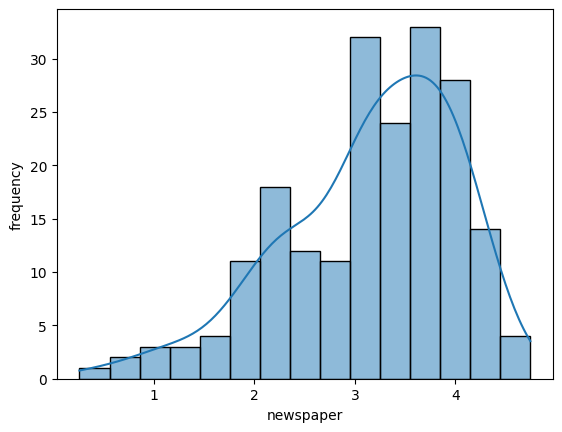

In [3]:
# visualization of difference
sns.histplot(df['Newspaper'],kde=True, bins=15)

plt.xlabel('newspaper')
plt.ylabel('frequency')
plt.show()

In [ ]:
# handling outliers in the newspaper as there are seen some
'''  
this is done after log i.e. applying skewing to the newspaper so it gives the 3 rows with the outliers
this log makes the outliers less extreme and model becomes robust to outliers so we may even ignore those outliers as skewness is already fixed
but here in newspaper there are still some i.e. 3 strictly visible outliers.
'''

q1=df['Newspaper'].quantile(0.25)
q3=df['Newspaper'].quantile(0.75)

interquartilerange=q3-q1 # this gives the values between the 3rd and 1st quartile

# this gives the boundary of the newspaper datasets
lower= q1-1.5*interquartilerange
upper=q3+1.5*interquartilerange

outlier= df[(df['Newspaper']<lower) | (df['Newspaper']>upper)]
print(outlier) # this prints the outlier of the newspaper but also gives the whole row including all 4 columns but only the newspapers are outliers not others


       TV  Radio  Newspaper  Sales
8     8.6    2.1   0.693147    4.8
33  265.6   20.0   0.262364   17.4
65   69.0    9.3   0.641854   11.3


In [ ]:
# fixing outliers
''' 
here as there are visible 3 outliers so we have to handle them and as from the above cell output it is 
visible that the tv has highest value corresponding to sales so removing this might affect on the output of model
so the best option is capping the outliers to the lower and upper bond
'''

# caping outliers
df['Newspaper'] = df['Newspaper'].clip(lower =lower,upper =upper)

# to see the changed outliers
outliersA = df[(df['Newspaper'] < lower) | (df['Newspaper'] > upper)]
print("Outliers after capping:")
print(outliersA)  # this should return the empty dataframe as the outlier is clipped off



Outliers after capping:
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []


In [7]:
df.to_csv("cleaned_data.csv",index=False) # index false vaneko pandas lai index load nagar vanne ho so data clean hos vanera
